#Numerical regression

in this example we will use Keras to predict wages based on various professional and demographic factors.

In [1]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib


sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [2]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_5_Energy_prediction/Vienna_all_energy_cleaned_Per.csv')
#pd.set_option('display.max_columns', None)
#data.dropna(inplace=True)

In [5]:
data.columns

Index(['osmid', 'building', 'lat', 'lon', 'area',
       'Heating_energy_kWh_per_m2_a', 'Cooling_energy_kWh_per_m2_a',
       'DHW_energy_kWh_per_m2_a', 'total_energy_kWh_per_m2_a',
       'u_value_walls_W_per_m2K', 'u_value_roof_W_per_m2K',
       'u_value_basement_W_per_m2K', 'u_value_glass_W_per_m2K',
       'g_value_glass_W_per_m2K', 'geometry'],
      dtype='object')

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15807 entries, 0 to 15806
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   osmid                        15807 non-null  int64  
 1   building                     15807 non-null  object 
 2   lat                          15807 non-null  float64
 3   lon                          15807 non-null  float64
 4   area                         15807 non-null  float64
 5   Heating_energy_kWh_per_m2_a  15807 non-null  float64
 6   Cooling_energy_kWh_per_m2_a  15807 non-null  float64
 7   DHW_energy_kWh_per_m2_a      15807 non-null  float64
 8   total_energy_kWh_per_m2_a    15807 non-null  float64
 9   u_value_walls_W_per_m2K      15807 non-null  float64
 10  u_value_roof_W_per_m2K       15807 non-null  float64
 11  u_value_basement_W_per_m2K   15807 non-null  float64
 12  u_value_glass_W_per_m2K      15807 non-null  float64
 13  g_value_glass_W_

In [7]:
data['building'].unique

<bound method Series.unique of 0         apartments
1        residential
2        residential
3        residential
4        residential
            ...     
15802         school
15803         school
15804         school
15805         school
15806         school
Name: building, Length: 15807, dtype: object>

In [8]:
data['building'].values

array(['apartments', 'residential', 'residential', ..., 'school',
       'school', 'school'], dtype=object)

In [17]:
data1=data

In [19]:
import numpy as np

In [20]:
data1['bdgcode'] = np.nan

In [21]:
for i in data1.index:
  if data1['building'][i]=='residential':
    data1['bdgcode'][i]= 1
  elif data1['building'][i]=='apartments':
    data1['bdgcode'][i]= 2
  elif data1['building'][i]=='detached':
    data1['bdgcode'][i]= 3
  elif data1['building'][i]=='school':
    data1['bdgcode'][i]= 4
  elif data1['building'][i]=='office':
    data1['bdgcode'][i]= 5
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib

In [ ]:
#data1=data.drop(data.columns[0, 1,4,17], axis= 1)

In [22]:
data1.columns

Index(['osmid', 'building', 'lat', 'lon', 'area',
       'Heating_energy_kWh_per_m2_a', 'Cooling_energy_kWh_per_m2_a',
       'DHW_energy_kWh_per_m2_a', 'total_energy_kWh_per_m2_a',
       'u_value_walls_W_per_m2K', 'u_value_roof_W_per_m2K',
       'u_value_basement_W_per_m2K', 'u_value_glass_W_per_m2K',
       'g_value_glass_W_per_m2K', 'geometry', 'bdgcode'],
      dtype='object')

In [24]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15807 entries, 0 to 15806
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   osmid                        15807 non-null  int64  
 1   building                     15807 non-null  object 
 2   lat                          15807 non-null  float64
 3   lon                          15807 non-null  float64
 4   area                         15807 non-null  float64
 5   Heating_energy_kWh_per_m2_a  15807 non-null  float64
 6   Cooling_energy_kWh_per_m2_a  15807 non-null  float64
 7   DHW_energy_kWh_per_m2_a      15807 non-null  float64
 8   total_energy_kWh_per_m2_a    15807 non-null  float64
 9   u_value_walls_W_per_m2K      15807 non-null  float64
 10  u_value_roof_W_per_m2K       15807 non-null  float64
 11  u_value_basement_W_per_m2K   15807 non-null  float64
 12  u_value_glass_W_per_m2K      15807 non-null  float64
 13  g_value_glass_W_

In [26]:
data2=data1.drop([data.columns[0],data.columns[2], 'lon','building'], axis = 1)

In [35]:
data3=data1.drop([data.columns[0],data.columns[2], 'lon','building','geometry'], axis = 1)

In [27]:
data2.shape

(15807, 12)

In [28]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15807 entries, 0 to 15806
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   area                         15807 non-null  float64
 1   Heating_energy_kWh_per_m2_a  15807 non-null  float64
 2   Cooling_energy_kWh_per_m2_a  15807 non-null  float64
 3   DHW_energy_kWh_per_m2_a      15807 non-null  float64
 4   total_energy_kWh_per_m2_a    15807 non-null  float64
 5   u_value_walls_W_per_m2K      15807 non-null  float64
 6   u_value_roof_W_per_m2K       15807 non-null  float64
 7   u_value_basement_W_per_m2K   15807 non-null  float64
 8   u_value_glass_W_per_m2K      15807 non-null  float64
 9   g_value_glass_W_per_m2K      15807 non-null  float64
 10  geometry                     15807 non-null  object 
 11  bdgcode                      15807 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.4+ MB
None


In [29]:
data2.columns

Index(['area', 'Heating_energy_kWh_per_m2_a', 'Cooling_energy_kWh_per_m2_a',
       'DHW_energy_kWh_per_m2_a', 'total_energy_kWh_per_m2_a',
       'u_value_walls_W_per_m2K', 'u_value_roof_W_per_m2K',
       'u_value_basement_W_per_m2K', 'u_value_glass_W_per_m2K',
       'g_value_glass_W_per_m2K', 'geometry', 'bdgcode'],
      dtype='object')

In [59]:
path = '/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_5_Energy_prediction/Vienna_energy_train5.csv'
data2.to_csv(path)

In [61]:
data3.columns

Index(['area', 'Heating_energy_kWh_per_m2_a', 'Cooling_energy_kWh_per_m2_a',
       'DHW_energy_kWh_per_m2_a', 'total_energy_kWh_per_m2_a',
       'u_value_walls_W_per_m2K', 'u_value_roof_W_per_m2K',
       'u_value_basement_W_per_m2K', 'u_value_glass_W_per_m2K',
       'g_value_glass_W_per_m2K', 'bdgcode'],
      dtype='object')

In [62]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15807 entries, 0 to 15806
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   area                         15807 non-null  float64
 1   Heating_energy_kWh_per_m2_a  15807 non-null  float64
 2   Cooling_energy_kWh_per_m2_a  15807 non-null  float64
 3   DHW_energy_kWh_per_m2_a      15807 non-null  float64
 4   total_energy_kWh_per_m2_a    15807 non-null  float64
 5   u_value_walls_W_per_m2K      15807 non-null  float64
 6   u_value_roof_W_per_m2K       15807 non-null  float64
 7   u_value_basement_W_per_m2K   15807 non-null  float64
 8   u_value_glass_W_per_m2K      15807 non-null  float64
 9   g_value_glass_W_per_m2K      15807 non-null  float64
 10  bdgcode                      15807 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB
None


In [60]:
path3 = '/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_5_Energy_prediction/Vienna_energy_train5_noGeo.csv'
data3.to_csv(path3)

In [37]:
for colname, col in data3.iteritems():
  print(colname, "min_val", col.min(), "max_val", col.max())

area min_val 0.0 max_val 18964.213
Heating_energy_kWh_per_m2_a min_val 3.4 max_val 240.8
Cooling_energy_kWh_per_m2_a min_val 2.5 max_val 14.5
DHW_energy_kWh_per_m2_a min_val 1.72 max_val 24.3
total_energy_kWh_per_m2_a min_val 7.62 max_val 259.1
u_value_walls_W_per_m2K min_val 0.088 max_val 2.59
u_value_roof_W_per_m2K min_val 0.065 max_val 2.17
u_value_basement_W_per_m2K min_val 0.088 max_val 3.8
u_value_glass_W_per_m2K min_val 0.062 max_val 3.0
g_value_glass_W_per_m2K min_val 0.039 max_val 0.8
bdgcode min_val 1.0 max_val 5.0


##Prepare Data

**NORMALIZE INPUTS**

In [38]:
data3.columns

Index(['area', 'Heating_energy_kWh_per_m2_a', 'Cooling_energy_kWh_per_m2_a',
       'DHW_energy_kWh_per_m2_a', 'total_energy_kWh_per_m2_a',
       'u_value_walls_W_per_m2K', 'u_value_roof_W_per_m2K',
       'u_value_basement_W_per_m2K', 'u_value_glass_W_per_m2K',
       'g_value_glass_W_per_m2K', 'bdgcode'],
      dtype='object')

In [ ]:
#data=data.dropna()

In [43]:
#same code as last time

#declare features
#X = data.iloc[:,1:-1]
X = data3[[ 'area', 
       'u_value_walls_W_per_m2K', 'u_value_roof_W_per_m2K',
       'u_value_basement_W_per_m2K', 'u_value_glass_W_per_m2K',
       'g_value_glass_W_per_m2K', 'bdgcode' ]]   

# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)

(15807, 7)


In [ ]:
#'Heating_energy_kWh_per_m2_a', 'Cooling_energy_kWh_per_m2_a',
#       'DHW_energy_kWh_per_m2_a', 'total_energy_kWh_per_m2_a',

In [44]:
#declare regression target
#y = data.loc[:,"wage_per_hour"].to_numpy()
y = data3.loc[:, ['Heating_energy_kWh_per_m2_a', 'Cooling_energy_kWh_per_m2_a','DHW_energy_kWh_per_m2_a', 'total_energy_kWh_per_m2_a']].to_numpy()

#y = y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()


#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)
print(y_scaled)


(15807, 4)
[[0.53748947 0.40833333 1.         0.61627167]
 [0.82603201 1.         0.62798937 0.88388739]
 [0.82603201 1.         0.62798937 0.88388739]
 ...
 [1.         0.325      0.45084145 1.        ]
 [1.         0.325      0.45084145 1.        ]
 [1.         0.325      0.45084145 1.        ]]


**SPLIT INTO TRAIN AND TEST**

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [46]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way 
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)
print(X_test)
print(y_test)

TRAIN input (12645, 7) output (12645, 4)
TEST input (3162, 7) output (3162, 4)
[[-0.20137407  0.85311596  0.17388361 ...  0.693263    0.09479546
   2.13607183]
 [ 0.0318442  -1.46460045 -1.4639682  ... -1.58407534  0.09479546
  -0.44919577]
 [-0.1456841   0.0079818   1.22534403 ...  0.45354318  0.09479546
  -0.44919577]
 ...
 [-0.30186823  0.85311596  0.17388361 ...  0.693263    0.09479546
  -0.44919577]
 [-0.26678575 -1.46460045 -1.4639682  ... -1.58407534  0.09479546
  -0.44919577]
 [-0.28131558  0.0079818   1.22534403 ...  0.45354318  0.09479546
  -0.44919577]]
[[0.82603201 1.         0.62798937 0.88388739]
 [0.04970514 0.15833333 0.45084145 0.09495785]
 [0.61415333 0.68333333 0.44198406 0.65205981]
 ...
 [0.82603201 1.         0.62798937 0.88388739]
 [0.04970514 0.15833333 0.45084145 0.09495785]
 [0.61415333 0.68333333 0.44198406 0.65205981]]


#Build model

From the cheatSheet
Regression between 0 and 1>> 
      activation = relu for hidden layers / sigmoid for final layer
      loss = mean squared error
      optimizer = adam
      input from data, is 8 columns
      output is 1 value prediction

In [47]:
# Instantiate a sequential model
#tf.seed(5)
#model.save()
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# Add 2 dense layers of 18 and 12 neurons each
model.add(tf.keras.layers.Dense(36, input_shape=(n_cols,), activation='relu'))
#model.add(tf.keras.layers.Dense(36, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
  
# Add a dense layer with 1 value output
#model.add(tf.keras.layers.Dense(1, activation= "linear"))
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                592       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1,052
Trainable params: 1,052
Non-trainable params: 0
_________________________________________________________________


#Train model

In [49]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=400, validation_split=0.2)

Epoch 1/400
317/317 [==============================] - 2s 3ms/step - loss: 0.1466 - val_loss: 0.1081
Epoch 2/400
317/317 [==============================] - 1s 2ms/step - loss: 0.1058 - val_loss: 0.1058
Epoch 3/400
317/317 [==============================] - 1s 3ms/step - loss: 0.1051 - val_loss: 0.1055
Epoch 4/400
317/317 [==============================] - 1s 2ms/step - loss: 0.1049 - val_loss: 0.1053
Epoch 5/400
317/317 [==============================] - 1s 3ms/step - loss: 0.1046 - val_loss: 0.1050
Epoch 6/400
317/317 [==============================] - 1s 2ms/step - loss: 0.1044 - val_loss: 0.1047
Epoch 7/400
317/317 [==============================] - 1s 2ms/step - loss: 0.1041 - val_loss: 0.1045
Epoch 8/400
317/317 [==============================] - 1s 2ms/step - loss: 0.1037 - val_loss: 0.1041
Epoch 9/400
317/317 [==============================] - 1s 2ms/step - loss: 0.1033 - val_loss: 0.1038
Epoch 10/400
317/317 [==============================] - 1s 2ms/step - loss: 0.1030 - val_lo

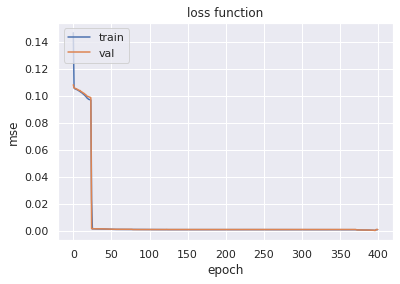

In [50]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data



In [51]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

99/99 [==============================] - 0s 1ms/step - loss: 0.0012
mse_test: 0.001160272629931569


#Plot error


In [52]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

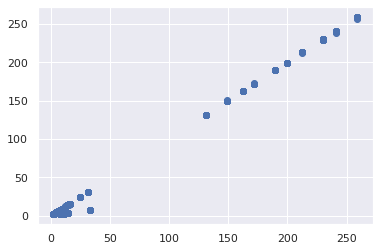

In [53]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)

'Heating-energy-kWh/m2 a', 'Cooling-energy-kWh/m2 a','DHW-energy-kWh/m2 a', 'total-energy-kWh/m2 a'

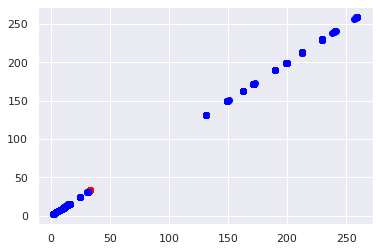

In [54]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)
plt.scatter(y_truth,y_truth, c='red')
plt.scatter(y_pred,y_pred, c='blue')

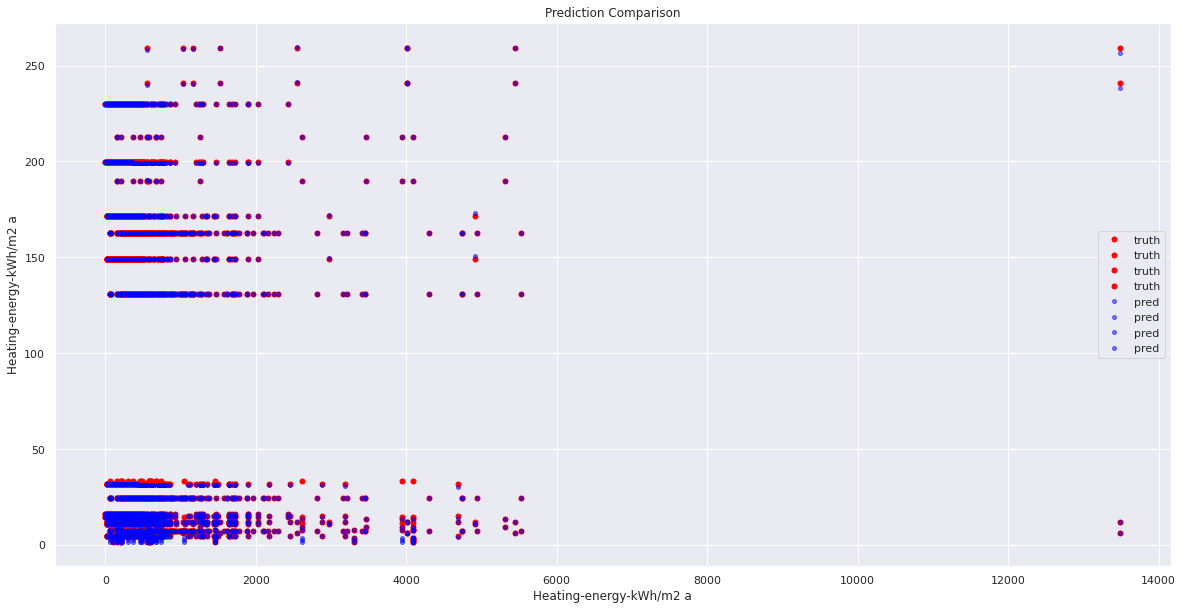

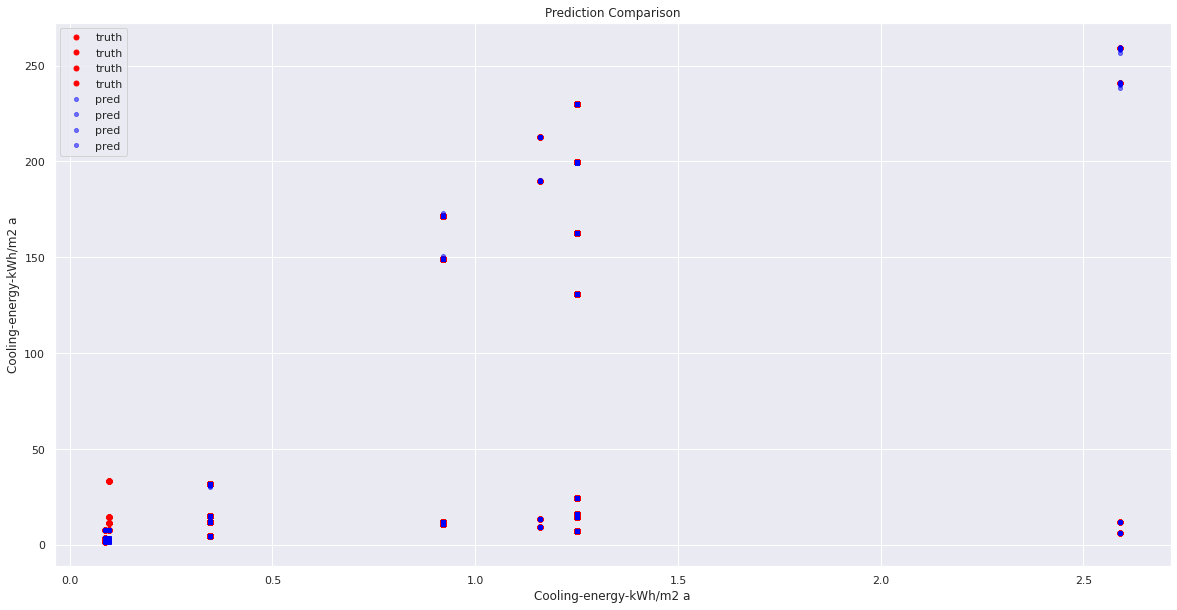

In [55]:
age_test = (scalerX.inverse_transform(X_test)[:,0])

exp_test = (scalerX.inverse_transform(X_test)[:,1])

plot_comparison(age_test, y_pred, y_truth, "Heating-energy-kWh/m2 a", "Heating-energy-kWh/m2 a")
plot_comparison(exp_test, y_pred, y_truth,  "Cooling-energy-kWh/m2 a", "Cooling-energy-kWh/m2 a")

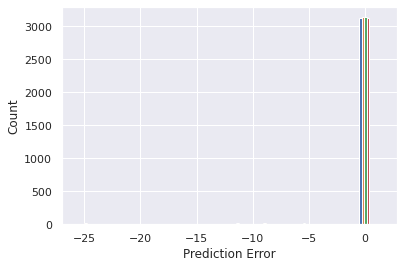

In [56]:
error = y_pred - y_truth
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

model saving

Saving model

In [57]:
#https://www.tensorflow.org/guide/keras/save_and_serialize
model.save("/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_5_Energy_prediction/ANN-4Dense.h5")



scalerX_filename = "/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_5_Energy_prediction/ANN_4D_scalerXAtoB.save"
joblib.dump(scalerX, scalerX_filename)

scalerY_filename = "/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_5_Energy_prediction/ANN_4D_scalerYAtoB.save"
joblib.dump(scalerY, scalerY_filename)

['/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_5_Energy_prediction/ANN_4D_scalerYAtoB.save']